In [6]:
import zipfile

content_zip = zipfile.ZipFile('C:/Users/kangminju/Documents/DL_ws/archive.zip')
content_zip.extractall('C:/Users/kangminju/Documents/DL_ws')

In [7]:
content_zip.close()

In [19]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
path = 'C:/Users/kangminju/Documents/DL_ws/Face Mask Dataset/'
dataset = {'image_path' : [], 'mask_status': [], 'where': []}

for where in os.listdir(path):
    for status in os.listdir(path + '/' + where):
        for image in glob.glob(path + where + '/' + status + '/' + '*.png'):
            dataset['image_path'].append(image)
            dataset['mask_status'].append(status)
            dataset['where'].append(where)

In [22]:
dataset = pd.DataFrame(dataset)
dataset.head()

,image_path,mask_status,where
0,C:/Users/kangminju/Documents/DL_ws/Face Mask D...,WithMask,Test
1,C:/Users/kangminju/Documents/DL_ws/Face Mask D...,WithMask,Test
2,C:/Users/kangminju/Documents/DL_ws/Face Mask D...,WithMask,Test
3,C:/Users/kangminju/Documents/DL_ws/Face Mask D...,WithMask,Test
4,C:/Users/kangminju/Documents/DL_ws/Face Mask D...,WithMask,Test


With Mask: 5909
Without Mask: 5883


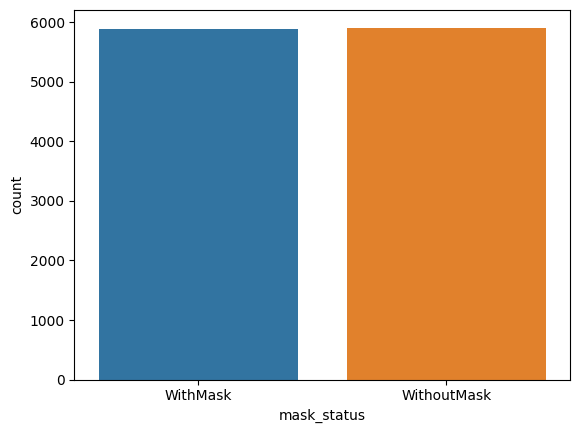

In [23]:
print('With Mask:', dataset.value_counts('mask_status')[0])
print('Without Mask:', dataset.value_counts('mask_status')[1])

sns.countplot(x=dataset['mask_status']);

In [24]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


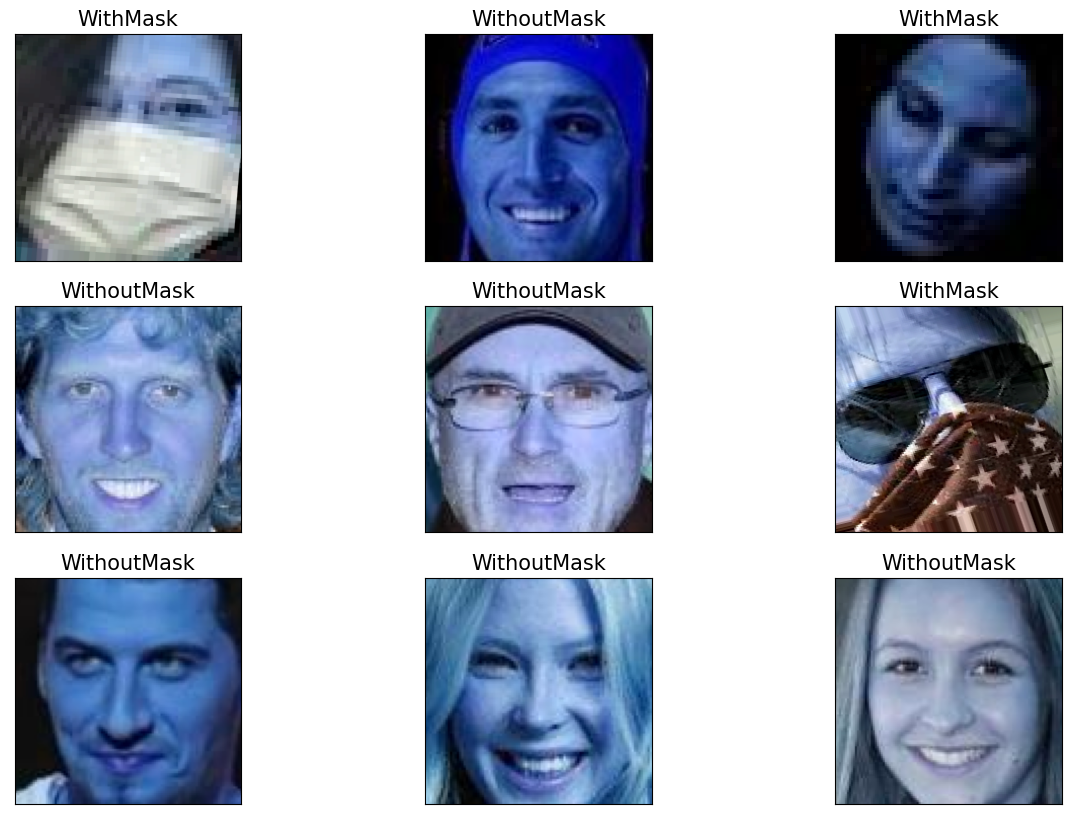

In [25]:
import cv2

plt.figure(figsize=(15,10))
for i in range(9):
    random = np.random.randint(1, len(dataset))
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.imread(dataset.loc[random, 'image_path']))
    plt.title(dataset.loc[random, 'mask_status'], size=15)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [26]:
train_df = dataset[dataset['where']=='Train']
test_df = dataset[dataset['where']=='Test']
valid_df = dataset[dataset['where']=='Validation']

train_df.head(5)

,image_path,mask_status,where
992,C:/Users/kangminju/Documents/DL_ws/Face Mask D...,WithMask,Train
993,C:/Users/kangminju/Documents/DL_ws/Face Mask D...,WithMask,Train
994,C:/Users/kangminju/Documents/DL_ws/Face Mask D...,WithMask,Train
995,C:/Users/kangminju/Documents/DL_ws/Face Mask D...,WithMask,Train
996,C:/Users/kangminju/Documents/DL_ws/Face Mask D...,WithMask,Train


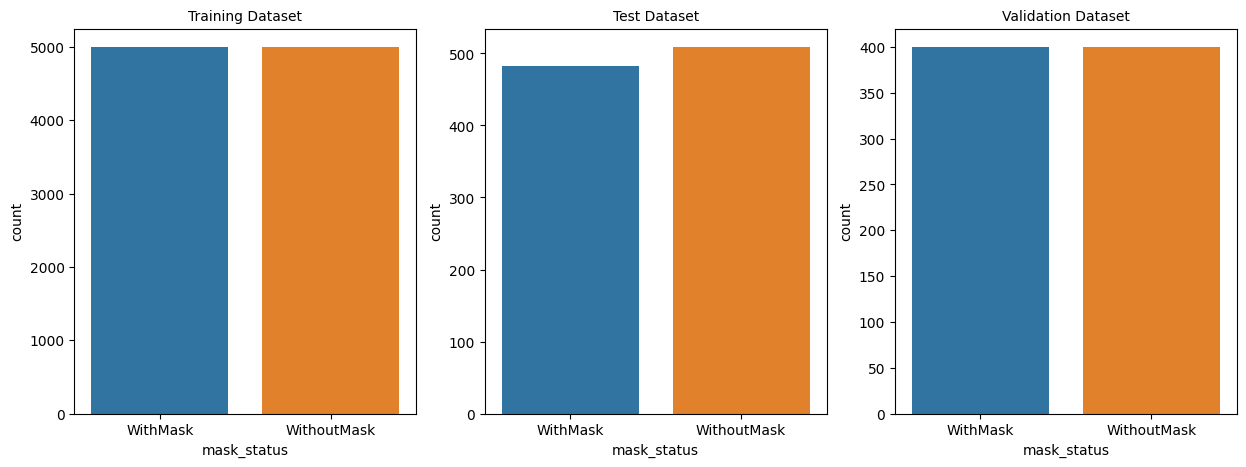

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(x=train_df['mask_status'])
plt.title('Training Dataset', size=10)

plt.subplot(1, 3, 2)
sns.countplot(x=test_df['mask_status'])
plt.title('Test Dataset', size=10)

plt.subplot(1, 3, 3)
sns.countplot(x=valid_df['mask_status'])
plt.title('Validation Dataset', size=10)

plt.show()

In [29]:
train_df = train_df.reset_index().drop('index', axis=1)
train_df.head()

,image_path,mask_status,where
0,C:/Users/kangminju/Documents/DL_ws/Face Mask D...,WithMask,Train
1,C:/Users/kangminju/Documents/DL_ws/Face Mask D...,WithMask,Train
2,C:/Users/kangminju/Documents/DL_ws/Face Mask D...,WithMask,Train
3,C:/Users/kangminju/Documents/DL_ws/Face Mask D...,WithMask,Train
4,C:/Users/kangminju/Documents/DL_ws/Face Mask D...,WithMask,Train


In [30]:
data = []
image_size=150

for i in range(len(train_df)):
    # Converting the image into grayscale
    img_array = cv2.imread(train_df['image_path'][i], cv2.IMREAD_GRAYSCALE)
    
    # Resizing the array
    new_image_array = cv2.resize(img_array, (image_size, image_size))
    
    # Encoding the image with the label
    if train_df['mask_status'][i] == 'WithMask':
        data.append([new_image_array,1])
    else:
        data.append([new_image_array, 0])

In [31]:
data[0]

[array([[238, 238, 238, ..., 199, 199, 199],
        [238, 238, 238, ..., 197, 197, 197],
        [237, 237, 238, ..., 194, 194, 195],
        ...,
        [236, 236, 236, ..., 151, 151, 152],
        [235, 235, 235, ..., 151, 152, 152],
        [235, 235, 235, ..., 151, 152, 152]], dtype=uint8),
 1]

In [32]:
np.random.shuffle(data)

In [33]:
data[0]

[array([[ 18,  18,  18, ..., 236, 238, 239],
        [ 18,  18,  18, ..., 236, 238, 239],
        [ 18,  18,  18, ..., 236, 237, 239],
        ...,
        [ 48,  48,  47, ..., 195, 196, 196],
        [ 43,  44,  47, ..., 198, 198, 198],
        [ 39,  42,  46, ..., 201, 200, 200]], dtype=uint8),
 0]

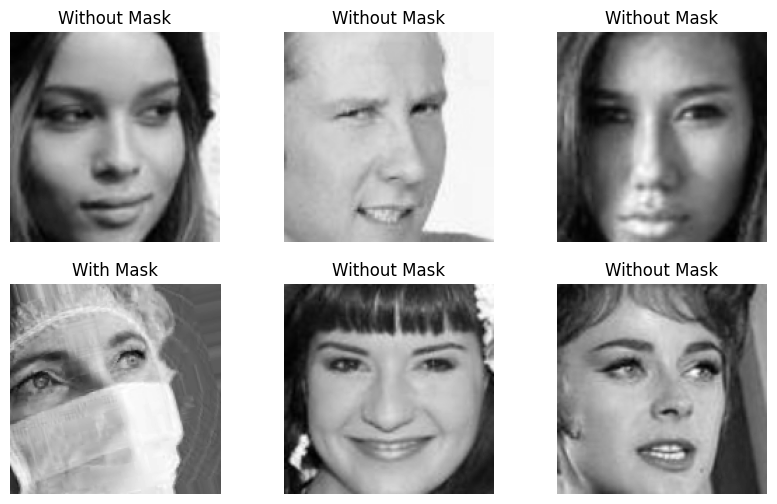

In [34]:
fig, ax = plt.subplots(2, 3, figsize=(10,6))

for row in range(2):
    for col in range(3):
        image_index = row * 100 + col
        
        ax[row, col].axis('off')
        ax[row, col].imshow(data[image_index][0], cmap='gray')
        
        if data[image_index][1] == 0:
            ax[row, col].set_title('Without Mask')
            
        else:
            ax[row, col].set_title('With Mask')

In [35]:
X = []
y = []

for image in data:
    X.append(image[0])
    y.append(image[1])

X = np.array(X)
y = np.array(y)

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
                                                 random_state=13)

In [39]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(
    32, kernel_size=(5, 5), strides=(1, 1), padding='same',
    activation='relu', input_shape=(150,150,1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [40]:
model.compile(
        optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=['accuracy'])

In [41]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 1)
history = model.fit(X_train, y_train, epochs=4, batch_size=32)

Epoch 1/4
250/250 [==============================] - 213s 847ms/step - loss: 41.5914 - accuracy: 0.8975
Epoch 2/4
250/250 [==============================] - 216s 863ms/step - loss: 0.0822 - accuracy: 0.9696
Epoch 3/4
250/250 [==============================] - 237s 950ms/step - loss: 0.0526 - accuracy: 0.9801
Epoch 4/4
250/250 [==============================] - 229s 916ms/step - loss: 0.0400 - accuracy: 0.9855


In [42]:
model.evaluate(X_val, y_val)

63/63 [==============================] - 14s 211ms/step - loss: 0.0975 - accuracy: 0.9645


[0.09751396626234055, 0.9645000100135803]

In [44]:
prediction = (model.predict(X_val) > 0.5).astype('int32')

print(classification_report(y_val, prediction))
print(confusion_matrix(y_val, prediction))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       987
           1       0.99      0.94      0.96      1013

    accuracy                           0.96      2000
   macro avg       0.97      0.96      0.96      2000
weighted avg       0.97      0.96      0.96      2000

[[974  13]
 [ 58 955]]


In [47]:
wrong_result = []

for n in range(0, len(y_val)):
    if prediction[n] != y_val[n]:
        wrong_result.append(n)
        
len(wrong_result)

71

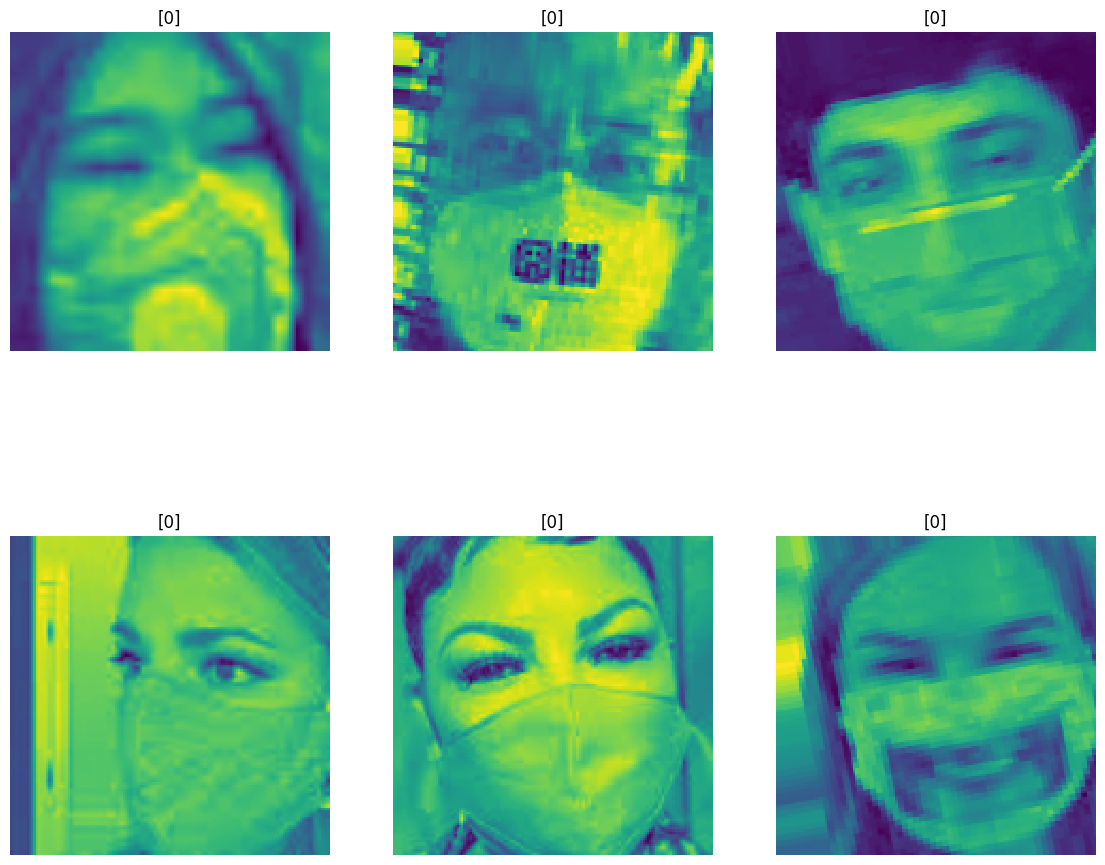

In [51]:
import random

samples = random.choices(population=wrong_result, k=6)

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(2, 3, idx+1)
    plt.imshow(X_val[n].reshape(150,150), interpolation='nearest')
    plt.title(prediction[n])
    plt.axis('off')
    
plt.show()